In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1- Introduction

### FINAL PROJECT : INDEKS PRICE FORECASTING

## 2- Import Library

In [81]:
# import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For charting
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from datetime import datetime

# For modelling
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')


os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [3]:
%cd /content/drive/MyDrive/kaggle/final

[Errno 2] No such file or directory: '/content/drive/MyDrive/kaggle/final'
/content


In [4]:
%ls

model_best.hdf5  prep_pipeline.pkl  sample_data/


## 3- Data loading

In [5]:
get_data = yf.Ticker("^JKSE")

df = pd.DataFrame(get_data.history(period="20y"), columns=['Open','High', 'Low', 'Close', 'Volume'])
df

,Open,High,Low,Close,Volume
Date,,,,,
2002-06-10,513.794983,513.794983,508.470001,511.365997,4540500
2002-06-11,510.923004,516.820984,510.923004,516.820984,5557000
2002-06-12,517.130005,523.965027,516.239014,523.965027,8484600
2002-06-13,524.028992,540.080017,524.028992,540.080017,16681400
2002-06-14,540.877991,545.036987,536.679016,545.004028,12060800
...,...,...,...,...,...
2022-06-02,7130.601074,7209.079102,7117.979004,7148.723145,227362900
2022-06-03,7176.682129,7233.995117,7170.692871,7182.960938,240581300
2022-06-06,7163.173828,7194.536133,7056.174805,7096.582031,231204100


In [6]:
# Duplicate the dataset

df_ori = df.copy()

In [7]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4859 entries, 2002-06-10 to 2022-06-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4859 non-null   float64
 1   High    4859 non-null   float64
 2   Low     4859 non-null   float64
 3   Close   4859 non-null   float64
 4   Volume  4859 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 227.8 KB


The 20 year JKSE Price History dasataset has 4858 rows and 5 columns.

In [8]:
# Dataset statists

df.describe()

,Open,High,Low,Close,Volume
count,4859.000000,4859.000000,4859.000000,4859.000000,4.859000e+03
mean,3660.727919,3681.307122,3637.298997,3660.847384,6.360486e+07
std,2025.999901,2033.950968,2016.166973,2024.441822,2.636218e+08
min,337.263000,342.539001,323.316986,337.475006,0.000000e+00
25%,1670.623535,1684.550964,1657.730469,1675.075989,1.963985e+07
50%,4069.937012,4103.287109,4035.842041,4075.352051,3.641750e+07
75%,5372.329102,5392.939453,5349.927490,5371.570557,6.138175e+07
max,7283.416992,7355.299805,7245.726074,7276.192871,9.788202e+09


In [9]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

from the syntax above we can see that there are no null value in the dataset.

## 4- Exploratory Data Analysis (EDA)

### 1. Histogram plot

In [10]:
# Get Numerical Columns and Categorical Columns (original)

num_columns = df.select_dtypes(include=np.number).columns.tolist()
num_columns

['Open', 'High', 'Low', 'Close', 'Volume']

In [11]:
# Numerical columns

print('Numerical Columns : \n' , df[num_columns].nunique())

Numerical Columns : 
 Open      4849
High      4849
Low       4844
Close     4850
Volume    4841
dtype: int64


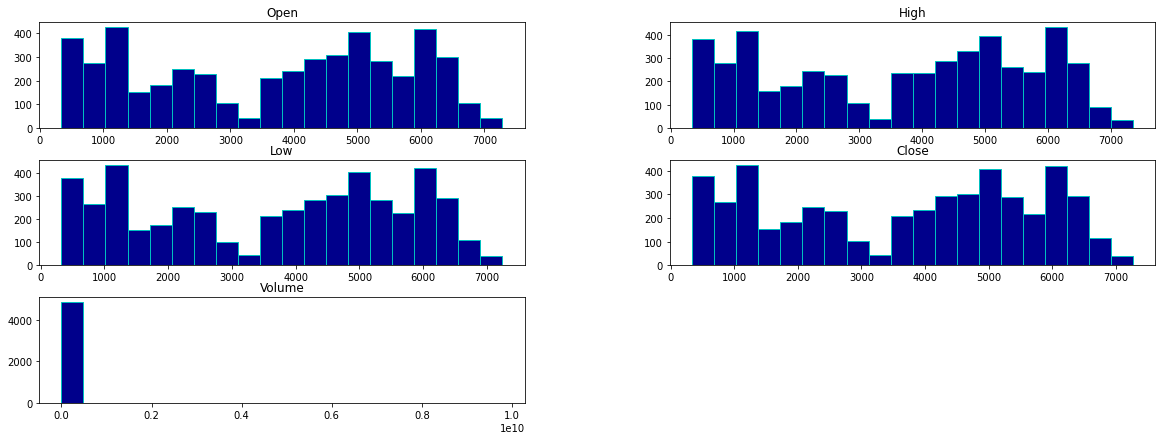

In [12]:
# Numerical column's value histogram

df.hist(bins=20, figsize=(20,7), grid=False, color='darkblue', edgecolor='c')
plt.show()


### 2. Index JKSE 20 years old Chart

In [13]:
fig = make_subplots(specs=[[{"secondary_y" : True}]])

fig.add_trace(go.Scatter(x=df.index,
                y=df['Close']),
                secondary_y = True) 
fig.update_traces(line_color='Cyan', line_width=1)

fig.add_trace(go.Bar(x=df.index, y=df['Volume'], opacity=1), secondary_y = False)

# ema_trace = go.Scatter(x=df.index, y=df['ma 20'], mode='lines', name='ma 20')
# fig.add_trace(ema_trace, secondary_y=True)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(showline=False, linewidth=1, linecolor='black', gridcolor='black')
# fig.update_yaxes(title_text="Harga")

# volume range shown
fig.update_layout(yaxis1 = dict(range=[0, 1000*10**6]))

#Background
fig.update_layout(showlegend=False, legend_bgcolor='black')
fig.update_layout(paper_bgcolor='black',plot_bgcolor='black', font_color = 'white')
fig.update_layout(title=dict({'text' : 'JKSE',
                                'xanchor' : 'center'}))
# # fig.update_layout(width=1000, height=500)
fig.update_layout(autosize=True)

# Drag mode
fig.update_layout(dragmode='pan')
fig.update_layout(template='plotly_dark')
fig.show()

From the figure above, we can see that from 20 years data perspective, JKSE index is bullish or the current price is much higher than it was 20 years ago. On another note, we can also see that from 20 years periods there were two times the index price were extremely bearish. The first time were at around 2008 - 2010. While the second time were around 2018 -2020 at the same time the covid19 pandemic hit us.

1. Area 2008 - 2009 (Financial Crisis 2008)

In [14]:
first_bottom = df['2008-01-01' :'2009-05-01']

fig = px.line(first_bottom, x=first_bottom.index, y=first_bottom['Close'])
fig.update_layout(template='plotly_dark')
fig.update_layout(width=800, height=400)
fig.show()

We can see that in the period of 2008 to 2009 the index were extremely bearish since the price had a huge drop from 2800 at the start of january 2009 to around 1100 at the end of the year. Fortunately the price began to rise on april 2009. Coincidently the huge fall on index at this period of time might be because the market got affected by the Indonesian Economic situation since we had monetary crisis in 2008.

2. Area 2018-2020 (Covid 19)

In [15]:
first_bottom = df['2017-12-01' :'2020-08-01']

fig = px.line(first_bottom, x=first_bottom.index, y=first_bottom['Close'])
fig.update_layout(template='plotly_dark')
fig.update_layout(width=800, height=400)
fig.show()

As we can see from the given chart, the index price strat to fell from feb 20th 2018. However the price drop were is just a normal correction. Then the index price move into consolidation area on july 2018 to early january 2020. Then as the first case Covid appear on **January 21 — CDC Confirms First US Coronavirus Case** the price began to fell significantly from around 6300 to slightly below 4000. The market were in Panic for almost half a year and decide to rise coming into May 2020.

### 3. Moving averages of the closing price

In [16]:
df_ma = df.copy()

In [17]:
df_ma['MA_5'] = df_ma['Close'].rolling(5).mean()
df_ma['MA_10'] = df_ma['Close'].rolling(10).mean()
df_ma['MA_20'] = df_ma['Close'].rolling(20).mean()
df_ma['MA_50'] = df_ma['Close'].rolling(50).mean()
df_ma['MA_100'] = df_ma['Close'].rolling(100).mean()
df_ma['MA_200'] = df_ma['Close'].rolling(200).mean()

In [18]:
# slice to 200 days
df_ma = df_ma[-200:]

In [19]:
fig = make_subplots(specs=[[{"secondary_y" : True}]])

# Price
fig.add_trace(go.Candlestick(x=df_ma.index,
                open=df_ma['Open'],
                high=df_ma['High'],
                low=df_ma['Low'],
                close=df_ma['Close'], name = 'index harga'),
                secondary_y = True)

# Moving averages
ema_trace5 = go.Scatter(x=df_ma.index, y=df_ma['MA_5'], mode='lines', name='ma 5')
fig.add_trace(ema_trace5, secondary_y=True)

ema_trace10 = go.Scatter(x=df_ma.index, y=df_ma['MA_10'], mode='lines', name='ma 10')
fig.add_trace(ema_trace10, secondary_y=True)

ema_trace20 = go.Scatter(x=df_ma.index, y=df_ma['MA_20'], mode='lines', name='ma 20')
fig.add_trace(ema_trace20, secondary_y=True)

ema_trace50 = go.Scatter(x=df_ma.index, y=df_ma['MA_50'], mode='lines', name='ma 50')
fig.add_trace(ema_trace50, secondary_y=True)

ema_trace100 = go.Scatter(x=df_ma.index, y=df_ma['MA_100'], mode='lines', name='ma 100')
fig.add_trace(ema_trace100, secondary_y=True)

ema_trace200 = go.Scatter(x=df_ma.index, y=df_ma['MA_200'], mode='lines', name='ma 200')
fig.add_trace(ema_trace200, secondary_y=True)

fig.update_layout(showlegend=True, legend_bgcolor='black')
fig.update_layout(xaxis_rangeslider_visible=False)

# volume
fig.add_trace(go.Bar(x=df_ma.index, y=df_ma['Volume'], opacity=1, name='Volume'), secondary_y = False)
# volume range shown
fig.update_layout(yaxis1 = dict(range=[0, 1000*10**6]))

# Drag mode
fig.update_layout(dragmode='pan')
fig.update_layout(template='plotly_dark')
fig.show()

From technical perspective, the current price for JKSE index price is above all of its moving average. This is a good indication that the price is in bullish direction. the Moving average usually used by trader and investor as dynamic support and resistance.

1. 5 days MA, 10 days MA, and 20 days MA can be used to define short-time trend. For Example if the price move above these three MA, then from short-time perspective the trend is bullish. On the other hand, if the price move below MA 5,10, and 20, we can see it as short-time bearish.

2. 50 days moving average can be used to see whether the index is bullish or bearish from the medium-time perspective. Above 50 days moving average the trend is bullish while below 50 days MA is bearish.

3. 100 days MA and 200 days MA to define longer preiod market trend. Above 100 MA or 200 MA from long-time perspective can be cactegorize as bullish while if the opposite it is bearish. 


### 4. Volume 

In [20]:
df_ma['volume MA_20'] = df_ma['Volume'].rolling(20).mean()

In [21]:
fig = make_subplots(specs=[[{"secondary_y" : True}]])


fig.add_trace(go.Bar(x=df_ma.index, y=df_ma['Volume']),
                secondary_y = True)

vma_trace20 = go.Scatter(x=df_ma.index, y=df_ma['volume MA_20'], mode='lines', name='volume ma 20')
fig.add_trace(ema_trace20, secondary_y=True)

# volume range shown
fig.update_layout(yaxis1 = dict(range=[0, 1000*10**6]))

fig.update_layout(template='plotly_dark')
fig.show()

### 5.Coorelation

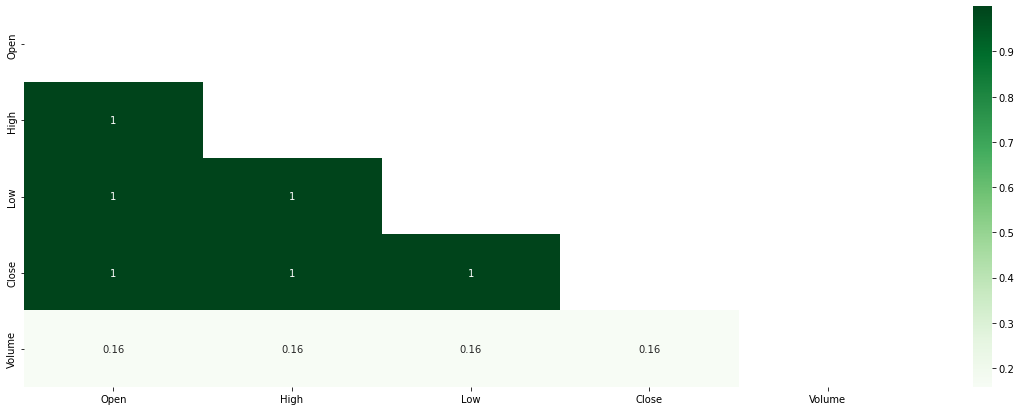

In [22]:
# plot the correlation heatmap
plt.figure(figsize=(20, 7))
mask=np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask ,cmap='Greens')
plt.show()

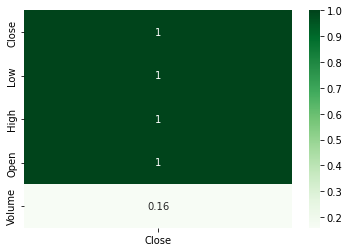

In [23]:
sns.heatmap(df.corr()[['Close']].sort_values(by='Close', ascending=False), annot=True,cmap='Greens')
plt.show()

From the coorelation heat map above we can see that from one feature to another is highly coorelated. So, for the training, we are going to us only one column, **Close** column.

## 5- Data preprocessing

### 1. Create new Dataset with only close column

For this project, we only need to use Close price column, because the purpose of time series LSTM sequence to sequence is to forecast the value in the future based on the previous value. 

In [24]:
data = df.filter(['Close'])
data

,Close
Date,
2002-06-10,511.365997
2002-06-11,516.820984
2002-06-12,523.965027
2002-06-13,540.080017
2002-06-14,545.004028
...,...
2022-06-02,7148.723145
2022-06-03,7182.960938
2022-06-06,7096.582031


In [25]:
# Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[ 511.36599731],
       [ 516.82098389],
       [ 523.96502686],
       ...,
       [7096.58203125],
       [7141.04492188],
       [7171.89208984]])

### 2. Splitting the dataset

In [26]:
dataset.shape

(4859, 1)

- Train-set

In [27]:
# Get the number of rows to train the model on
train_data_len = int(np.ceil( len(dataset) * .80 ))

train_data_len

3888

In [28]:
trainset = dataset[0:int(train_data_len), :]
trainset.shape

(3888, 1)

In [29]:
trainset

array([[ 511.36599731],
       [ 516.82098389],
       [ 523.96502686],
       ...,
       [6068.32519531],
       [6011.05517578],
       [5983.58691406]])

- Test-set

In [30]:
testset = dataset[train_data_len-60:,:]
testset.shape

(1031, 1)

### 3. Feature scaling

Normalizing the dataset by rescalling the trainset and test set using MinMaxScaler. This process will rescale the initial value from both set into a new value with the range of 0 and 1. The purpose of this process is so that it is easier for the model to learn the data.

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(trainset)

train_scaled = scaler.transform(trainset)
test_scaled = scaler.transform(testset)

In [32]:
train_scaled

array([[0.0273766 ],
       [0.0282354 ],
       [0.02936013],
       ...,
       [0.90223862],
       [0.89322229],
       [0.88889782]])

### 4. Splitting the trainset and testset

The trainset then divided into X_train and y_train, while the test set divided into X_test and y_test.

1. X_train, y_train

In [33]:
# Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])    

In [34]:
print(X_train[:2])
print(y_train[:2])

[array([0.0273766 , 0.0282354 , 0.02936013, 0.0318972 , 0.03267241,
       0.03259511, 0.03185563, 0.03102186, 0.03031056, 0.02965893,
       0.0285487 , 0.02825713, 0.02613821, 0.02666814, 0.02637578,
       0.02436958, 0.02303358, 0.02220768, 0.02381194, 0.0244505 ,
       0.02316504, 0.02248712, 0.02202521, 0.02099306, 0.02237755,
       0.02258049, 0.02271667, 0.0223404 , 0.0237326 , 0.02320204,
       0.02169444, 0.02197892, 0.01929418, 0.01821212, 0.01643625,
       0.01851613, 0.01973358, 0.0198674 , 0.01949176, 0.01870962,
       0.01769542, 0.01628779, 0.01725271, 0.01715888, 0.01775257,
       0.0174821 , 0.01786829, 0.01735016, 0.01751595, 0.01787049,
       0.01794354, 0.01877826, 0.01885273, 0.01839947, 0.01901756,
       0.01872442, 0.01804036, 0.01660849, 0.01597166, 0.01671948]), array([0.0282354 , 0.02936013, 0.0318972 , 0.03267241, 0.03259511,
       0.03185563, 0.03102186, 0.03031056, 0.02965893, 0.0285487 ,
       0.02825713, 0.02613821, 0.02666814, 0.02637578, 0.02

2. X_test, y_test

In [35]:
# Split the data into x_train and y_train data sets
X_test = []
y_test = []

for i in range(60, len(test_scaled)):
    X_test.append(test_scaled[i-60:i, 0])
    y_test.append(test_scaled[i, 0])  

In [36]:
print(X_test[:2])
print(y_test[:2])

[array([0.9781646 , 0.97021696, 0.94946009, 0.961229  , 0.959702  ,
       0.97030752, 0.95647842, 0.95172022, 0.94216087, 0.93949208,
       0.93707066, 0.92982948, 0.9407325 , 0.93148209, 0.92465318,
       0.92299595, 0.92444093, 0.91365453, 0.92123503, 0.92935617,
       0.9275366 , 0.91621432, 0.92032824, 0.91904116, 0.93023152,
       0.94277708, 0.94830531, 0.94041301, 0.93404088, 0.93662611,
       0.9364709 , 0.94186191, 0.94751321, 0.94464693, 0.93999521,
       0.92763446, 0.90405305, 0.87718641, 0.87876699, 0.89063091,
       0.89340848, 0.86924122, 0.85878961, 0.8733922 , 0.85601411,
       0.876988  , 0.88468565, 0.88316211, 0.86599558, 0.86652262,
       0.8625011 , 0.85736715, 0.84958102, 0.85229916, 0.85873541,
       0.88306502, 0.88766278, 0.90223862, 0.89322229, 0.88889782]), array([0.97021696, 0.94946009, 0.961229  , 0.959702  , 0.97030752,
       0.95647842, 0.95172022, 0.94216087, 0.93949208, 0.93707066,
       0.92982948, 0.9407325 , 0.93148209, 0.92465318, 0.92

### 5. Convert the dataset to numpy arrays

In [37]:
# Convert the x_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(3828, 60)
(3828,)

(971, 60)
(971,)


### 6- Reshape the data

In [38]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(3828, 60, 1)
(971, 60, 1)


## 6- Model Training and Model Validation

**LSTM**

LSTM is one of the Recurrent Neural Network algorithm which is commonly used for processing and forecasting time-series data. The LSTM model analyze the historcial price patterns and use it to predict the futures values of a time-series problem.

### Model Definition

In [39]:

initializer = tf.keras.initializers.GlorotUniform()  # Using initializer GlorotUniform to handle gradient vanishing

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, kernel_initializer= initializer, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=True, kernel_initializer= initializer))
model.add(LSTM(32, return_sequences=False))

model.add(Dense(28))
model.add(Dropout(0.01))
model.add(Dense(1))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 28)                924       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 129,337
Trainable params: 129,337
Non-trai

Using tensorflow callback so that when training the model, the best model from epochs can be automatically saved. 
1. First, using early stopping to monitor 'val_loss' in this case with the patience of 5 so the training will stop after the val_loss drop 5 times from the best value.
2. ModelCheckpoint, to save the model with the best 'val_loss' in this case. Model willbe saved as 'model_best.hdf5' format.

### Model Training

In [41]:
# callbacks

callbacks= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 5, verbose=1),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only= True)
    #ReduceLROnPlateau

]

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

# Compile
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam') # Paling modern , validation_data= (X_test, y_test) ,

# Model Training
epochs=100
history= model.fit(X_train,y_train, batch_size= 32, epochs=epochs,
                   validation_data= (X_test, y_test), 
                          callbacks= callbacks, verbose=1)

Epoch 1/100
120/120 [==============================] - 14s 52ms/step - loss: 0.0075 - val_loss: 0.0015
Epoch 2/100
120/120 [==============================] - 3s 21ms/step - loss: 5.2374e-04 - val_loss: 0.0016
Epoch 3/100
120/120 [==============================] - 3s 24ms/step - loss: 4.9761e-04 - val_loss: 0.0015
Epoch 4/100
120/120 [==============================] - 3s 21ms/step - loss: 4.7518e-04 - val_loss: 0.0016
Epoch 5/100
120/120 [==============================] - 2s 19ms/step - loss: 4.9093e-04 - val_loss: 0.0010
Epoch 6/100
120/120 [==============================] - 2s 19ms/step - loss: 4.8764e-04 - val_loss: 7.0875e-04
Epoch 7/100
120/120 [==============================] - 2s 19ms/step - loss: 3.9379e-04 - val_loss: 9.2296e-04
Epoch 8/100
120/120 [==============================] - 2s 19ms/step - loss: 3.9147e-04 - val_loss: 6.5703e-04
Epoch 9/100
120/120 [==============================] - 2s 16ms/step - loss: 3.7833e-04 - val_loss: 9.2323e-04
Epoch 10/100
120/120 [===========

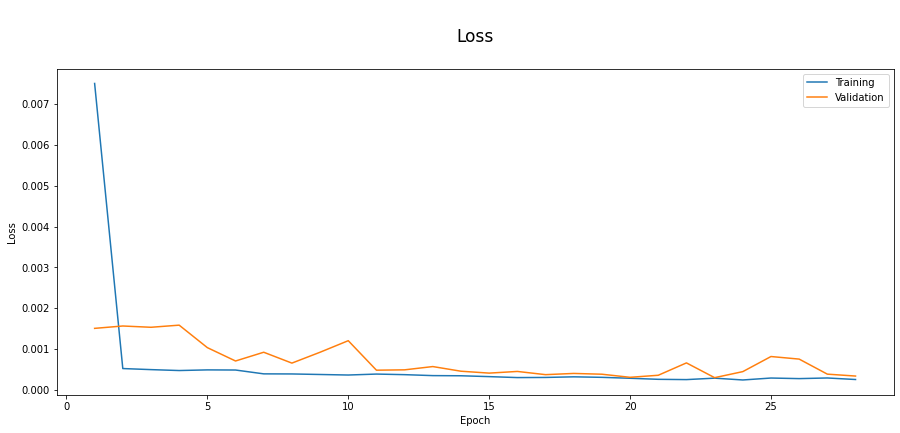

In [43]:
# Plot Sequential API result
epochs=len(history.history['loss'])

plt.figure(figsize=(15,6))
plt.plot(range(1,epochs+1),history.history['loss'],label='Training')
plt.plot(range(1,epochs+1),history.history['val_loss'],label='Validation')
plt.title('\nLoss\n', fontsize=17)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

### Model Evaluation

In [44]:
# Compute MSE of the LSTM model

lstm_loss = model.evaluate(X_test, y_test)

print('MSE - LSTM : ', lstm_loss)

31/31 [==============================] - 0s 6ms/step - loss: 3.4015e-04
MSE - LSTM :  0.00034015480196103454


In [45]:
# Get the models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

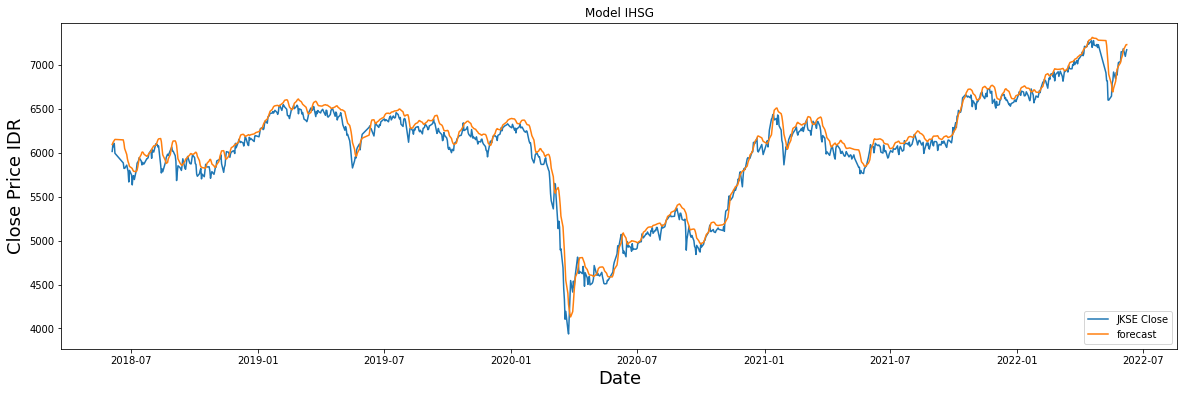

In [46]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['forecast'] = predictions

# Visualize the data
plt.figure(figsize=(20,6))
plt.title('Model IHSG')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)

# plt.plot(train['Close'])
plt.plot(valid[['Close', 'forecast']])
plt.legend(['JKSE Close', 'forecast'], loc='lower right')
plt.show()

In [47]:
# take a look at the data :
valid

,Close,forecast
Date,,
2018-06-04,6014.818848,6093.242676
2018-06-05,6088.790039,6112.654297
2018-06-06,6069.712891,6128.055664
2018-06-07,6106.698242,6139.013184
2018-06-08,5993.626953,6151.611328
...,...,...
2022-06-02,7148.723145,7113.789551
2022-06-03,7182.960938,7164.954590
2022-06-06,7096.582031,7210.756836


Forecasting the next day price close:

In [48]:
X_test.shape

(971, 60, 1)

In [49]:
hist60days = X_test[-1].reshape(1, 60, 1)
forecast = model.predict(hist60days)
forecast = scaler.inverse_transform(forecast)
forecast

array([[7230.3975]], dtype=float32)

In [50]:
date = pd.to_datetime('today').normalize()
date

Timestamp('2022-06-08 00:00:00')

In [51]:
# initialize list of lists
data = [[date, forecast[0][0]]]
 
# Create the pandas DataFrame
x = pd.DataFrame(data, columns=['date', 'pred'])
x.set_index(['date'],inplace=True)

# print dataframe.
x

,pred
date,
2022-06-08,7230.397461


In [52]:
fig = make_subplots(specs=[[{"secondary_y" : True}]])

fig.add_trace(go.Scatter(x=valid.index,
                y=valid['Close'], name='JKSE price'),
                secondary_y = True) 
fig.update_traces(line_color='black', line_width=3)

fig.add_trace(go.Scatter(x=x.index,
                y=x['pred'], name='forecast'),
                secondary_y = True)
# fig.update_traces(line_color='Black', line_width=3)

fig.show()

## 7- Model Saving

In [54]:
prep_pipeline = make_pipeline(MinMaxScaler(feature_range=(0,1)))

prep_pipeline.fit(trainset)

Pipeline(steps=[('minmaxscaler', MinMaxScaler())])

In [55]:
# save  pipeline

with open("/content/prep_pipeline.pkl", "wb") as f:
  pickle.dump(prep_pipeline, f)

The model LSTM in this project is automatically saved by using a callback method where during the model training only the best model is saved. The best model is selected according to validation loss value, the lower the value the better the model performance.

The saved model can be loaded as :

In [56]:
pickled_model = pickle.load(open('prep_pipeline.pkl', 'rb'))

In [57]:
saved_model = tf.keras.models.load_model('/content/model_best.hdf5')

In [58]:
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 28)                924       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 129,337
Trainable params: 129,337
Non-trai

## 8- Model Inference

In [64]:
import datetime

In [75]:
get_data = yf.Ticker("^JKSE")

data_inference = pd.DataFrame(get_data.history(period="60d"), columns=['Close'])
data_inference[-5:]

,Close
Date,
2022-06-02,7148.723145
2022-06-03,7182.960938
2022-06-06,7096.582031
2022-06-07,7141.044922
2022-06-08,7171.892090


In [76]:
data_inf = pickled_model.transform(data_inference)

X_next = data_inf.reshape(1, 60, 1)

In [77]:
next_day = saved_model.predict(X_next)
next_day = pickled_model.inverse_transform(next_day)
next_day

array([[7113.9727]], dtype=float32)

In [78]:
date = datetime.datetime.today() + datetime.timedelta(days=1)
date

datetime.datetime(2022, 6, 9, 6, 12, 29, 508068)

In [79]:
# initialize list of lists
data = [[date, next_day[0][0]]]
 
# Create the pandas DataFrame
y = pd.DataFrame(data, columns=['date', 'pred'])
y.set_index(['date'],inplace=True)

# print dataframe.
y

,pred
date,
2022-06-09 06:12:29.508068,7113.972656


In [80]:
# if we plot it :

fig = make_subplots(specs=[[{"secondary_y" : True}]])

fig.add_trace(go.Scatter(x=data_inference.index,
                y=data_inference['Close'], name='JKSE price'),
                secondary_y = True) 
fig.update_traces(line_color='black', line_width=3)

fig.add_trace(go.Scatter(x=y.index,
                y=y['pred'], name='forecast'),
                secondary_y = True)
# fig.update_traces(line_color='Black', line_width=3)

fig.show()

## 9- Conclusion

For this project , we decided to train a model using LSTM algorithm. The reason for this is because LSTM is commonly used for processing and forecasting time-series data. LSTM use a sequence to sequence algorithm where to forecast the next day value the algorithm will use the historical data or the previous value. For our model, to predict the next day Index price it will need to use 60 days previous value or 3 month worth of market open data. 

Our Model trained using sequential API method and use 3 LSTM layers with initializer to handle gradient vanishing. Also, we also use 1 Dense layer combine with 1 Dropout and 1 output layer.

For the model evaluation, we use Mean Squared Error (MSE). This metrics value tell us about the average squared difference between the estimated values and the actual value. the lower the value the better. As for our model, the MSE value is around 0.0002 which is good. Which mean that the different between the actual price and forecast price will be small and the model shoul be able to predict well with small error.


However, although the model can perform well. We suggest that to always use the prediction result as second or third opinion only. Since forecasting and predicting the time-series is always a hard task to do.

To conclude, Although from the 20 years data perpective we can see that the Index price going higher and higher, there might be a time where the price going to drop as a result of overal world situation or a country situation. So, for all of the traders and investors, they have to always keep themselves up-to-date about the current situation or even to be able to predict what comes next.